In [3]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import random

# imagen=plt.imread('181cab12f0d3d4168ddac0edfbd1f157.jpg')
# plt.imshow(imagen)
# plt.show()

## 1. Paso los links a un arreglo de numpy

In [6]:
import urllib.request

images = np.loadtxt("20_images.txt", dtype = 'str')
images

array(['https://i.ytimg.com/vi/bDPkImgNs8Y/maxresdefault.jpg',
       'https://e00-marca.uecdn.es/albumes/2014/11/18/comics_nba/1416295630_extras_albumes_0_980.jpg',
       'https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/fairy-tail-natsu-padres-1559572361.png',
       'https://static.wikia.nocookie.net/fairytail/images/b/bf/830px-You_like_him.jpg/revision/latest?cb=20120127154134&path-prefix=es',
       'https://static.wikia.nocookie.net/doblaje/images/7/7c/Dragon-Ball-Z.png/revision/latest?cb=20200911193425&path-prefix=es',
       'https://depor.com/resizer/EkdERO36Wj8BqMsc67Kd20z2f0U=/1200x1200/smart/filters:format(jpeg):quality(75)/cloudfront-us-east-1.images.arcpublishing.com/elcomercio/NRFDECK2RBDCTKHGOOT5XJQEDI.jpg',
       'https://www.rd.com/wp-content/uploads/2019/01/shutterstock_673465372.jpg?fit=700,467',
       'https://images.unsplash.com/photo-1611267254323-4db7b39c732c?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxzZWFyY2h8M3x8Y3V0ZSUyMGNhdHxlbnwwfHwwfHw%3D&w=1000&q=8

In [ ]:
### Los pasos que tengan * se deben hacer de manera paralelizada

## Quinto paso: hacer un dataframe que tenga el link de la imagen con una columna llamada url, su antiguo color con columna llamada 
## oldcolor y su nuevo color con columna llamada newcolor
## *Sexto paso: hacer una columna nueva que tenga diffcolor como la diferencia numerica entre newcolor y oldcolor

## 2. Cargando las imagenes a vectores

In [46]:
# Primero tengo que descargar las imagenes de los links correspondientes
from urllib.parse import urlparse

names = []
for i in range(20):                 # No se porque no me deja iterar con for i in images
    aux = urlparse(images[i])
    names.append(os.path.basename(aux.path))

names

['maxresdefault.jpg',
 '1416295630_extras_albumes_0_980.jpg',
 'fairy-tail-natsu-padres-1559572361.png',
 'latest',
 'latest',
 'NRFDECK2RBDCTKHGOOT5XJQEDI.jpg',
 'shutterstock_673465372.jpg',
 'photo-1611267254323-4db7b39c732c',
 '20523050.png',
 '41b9u-1yUVS._AC_.jpg',
 'cthulhu-2.jpg',
 'il_1080xN.3926159075_hj39.jpg',
 'fan-art-chihiro-7.jpg',
 '557b36ec0911375e91f88c45b9e30a92--batman-animado-chibi.jpg',
 'il_fullxfull.4384629284_5nk6.jpg',
 'CEIJaGZP_400x400.jpg',
 'latest',
 'tvkk3sxgp8181.png',
 'Ew7fd58XIAIvPRs.png',
 'eed60545d30bafa2dd7ce23e9c076801--los-simpsons-cartoon-characters.jpg']

In [26]:
for i in range(20):
    os.system(f'curl -o {names[i]} {images[i]}')

In [51]:
names = ['maxresdefault.jpg',
 '1416295630_extras_albumes_0_980.jpg',
 'NRFDECK2RBDCTKHGOOT5XJQEDI.jpg',
 'shutterstock_673465372.jpg',
 '41b9u-1yUVS._AC_.jpg',
 'cthulhu-2.jpg',
 'il_1080xN.3926159075_hj39.jpg',
 'fan-art-chihiro-7.jpg',
 '557b36ec0911375e91f88c45b9e30a92--batman-animado-chibi.jpg',
 'il_fullxfull.4384629284_5nk6.jpg',
 'CEIJaGZP_400x400.jpg',
 'eed60545d30bafa2dd7ce23e9c076801--los-simpsons-cartoon-characters.jpg']

In [52]:
names

['maxresdefault.jpg',
 '1416295630_extras_albumes_0_980.jpg',
 'NRFDECK2RBDCTKHGOOT5XJQEDI.jpg',
 'shutterstock_673465372.jpg',
 '41b9u-1yUVS._AC_.jpg',
 'cthulhu-2.jpg',
 'il_1080xN.3926159075_hj39.jpg',
 'fan-art-chihiro-7.jpg',
 '557b36ec0911375e91f88c45b9e30a92--batman-animado-chibi.jpg',
 'il_fullxfull.4384629284_5nk6.jpg',
 'CEIJaGZP_400x400.jpg',
 'eed60545d30bafa2dd7ce23e9c076801--los-simpsons-cartoon-characters.jpg']

In [53]:
# Ahora ya que tengo las imagenes, paralelizo
from joblib import Parallel, delayed

def avec(im):
    return plt.imread(im)

res = Parallel(n_jobs = -1)(delayed(avec)(n) for n in names)

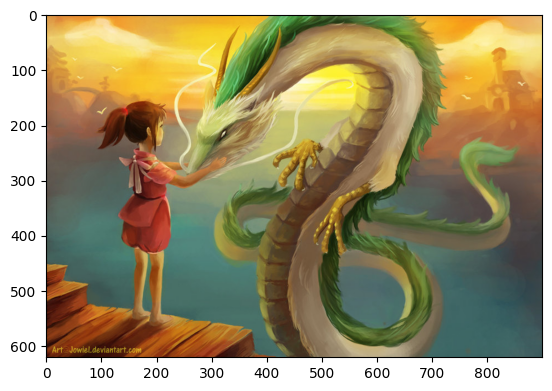

In [56]:
# Checo una imagen
plt.imshow(res[7])

## 3. Obtener los primeros colores

In [57]:
#colors = np.unique(imagen.reshape(-1, imagen.shape[2]), axis=0)

def color(im):
    return np.unique(im.reshape(-1, im.shape[2]), axis=0)

res2 = Parallel(n_jobs = -1)(delayed(color)(i) for i in res)

In [58]:
res2

[array([[  0,   0,   0],
        [  0,   0,   2],
        [  0,   0,   4],
        ...,
        [255, 255, 251],
        [255, 255, 253],
        [255, 255, 255]], dtype=uint8),
 array([[  0,   0,   0],
        [  0,   0,   2],
        [  0,   0,   4],
        ...,
        [255, 255, 251],
        [255, 255, 253],
        [255, 255, 255]], dtype=uint8),
 array([[  0,   0,   0],
        [  0,   0,   2],
        [  0,   0,   4],
        ...,
        [255, 255, 251],
        [255, 255, 253],
        [255, 255, 255]], dtype=uint8),
 array([[  7,   0,   0],
        [  8,   0,   0],
        [  9,   0,   0],
        ...,
        [254, 203, 148],
        [255, 204, 150],
        [255, 252, 248]], dtype=uint8),
 array([[  0,   0,   0],
        [  0,   0,   2],
        [  0,   0,   4],
        ...,
        [255, 255, 251],
        [255, 255, 253],
        [255, 255, 255]], dtype=uint8),
 array([[  0,   2,   0],
        [  0,   2,   1],
        [  0,   3,   0],
        ...,
        [255, 198, 116

## 4. Randomize los colores de la imagen

In [59]:
def newCol(im):
    r = np.random.randint(0,2)
    res = im.copy()
    res[:,:,r] = 0
    return res

newRes = Parallel(n_jobs=4)(delayed(newCol)(i)for i in res)

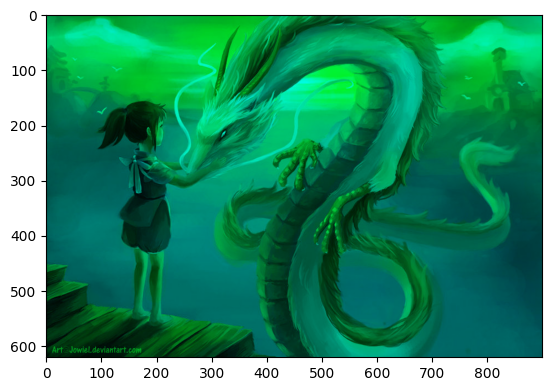

In [61]:
plt.imshow(newRes[7])

## 5. Dataframe

In [1]:
newColumn = Parallel(n_jobs = -1)(delayed(color)(i) for i in newRes)

data = {'Imagen': images[:12],
        'Antiguo Color': res,
        'Nuevo Color': newRes}
df = pd.DataFrame(data)